In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def process_model_train_outputs(main_directory, results_file_to_process='test_results.json'):
    # Dictionary to store data size, average f1, and standard deviation
    data_size_stats = {}
    eval_type = results_file_to_process.split("_")[0]

    # Walk through subfolders and process JSON files
    for root, dirs, files in os.walk(main_directory):
        for file in files:
            if file == results_file_to_process:
                filepath = os.path.join(root, file)
                with open(filepath, 'r') as json_file:
                    data = json.load(json_file)
                    #print(filepath.split('_data_size_'))
                    data_size = int(filepath.split('_data_size_')[2].split('_')[0])
                    f1_value = data[f'{eval_type}_f1']
                    if data_size in data_size_stats:
                        data_size_stats[data_size].append(f1_value)
                    else:
                        data_size_stats[data_size] = [f1_value]

    # Calculate average and standard deviation for each data size
    data_sizes = []
    average_f1 = []
    std_dev_f1 = []

    for data_size, f1_values in data_size_stats.items():
        data_sizes.append(data_size)
        average_f1.append(np.mean(f1_values))
        std_dev_f1.append(np.std(f1_values))
    return data_sizes, average_f1, std_dev_f1

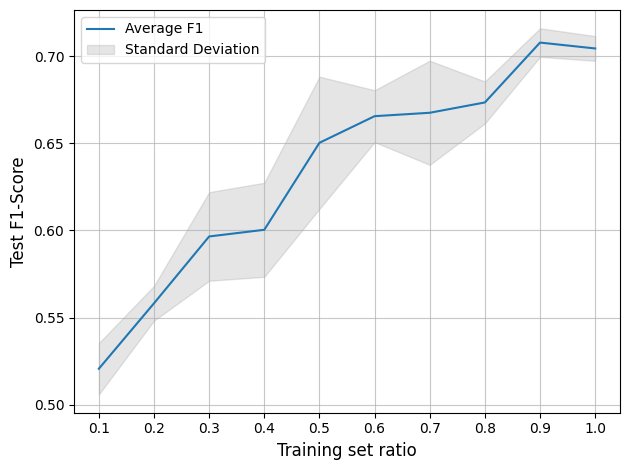

In [16]:
# Define the main directory path
main_directory = './bert/train_data_size_impact_experiment/'
results_file_to_process = 'test_results.json'
data_sizes, average_f1, std_dev_f1 = process_model_train_outputs(main_directory, results_file_to_process)
    
# Sort the data sizes and corresponding average f1 values
sorted_indices = np.argsort(data_sizes)
sorted_data_sizes = np.array(data_sizes)[sorted_indices] / 100.0  # Divide by 100 for decimal display
sorted_average_f1 = np.array(average_f1)[sorted_indices]
sorted_std_dev_f1 = np.array(std_dev_f1)[sorted_indices]

# Plotting
plt.plot(sorted_data_sizes, sorted_average_f1, label='Average F1')
plt.fill_between(sorted_data_sizes, sorted_average_f1 - sorted_std_dev_f1, sorted_average_f1 + sorted_std_dev_f1, color='gray', alpha=0.2, label='Standard Deviation')
plt.xlabel('Training set ratio',fontsize=12)
plt.ylabel('Test F1-Score',fontsize=12)
#plt.title('Average F1 Score with Standard Deviation vs. Data Size')
plt.legend()
plt.grid(alpha=0.7)
# Set custom ticks on the x-axis
plt.xticks(sorted_data_sizes)
plt.tight_layout()
plt.savefig('evaluations/plots/F1_score_vs_train_data_size_NEW.pdf')  # Change the filename and dpi as needed
plt.show()


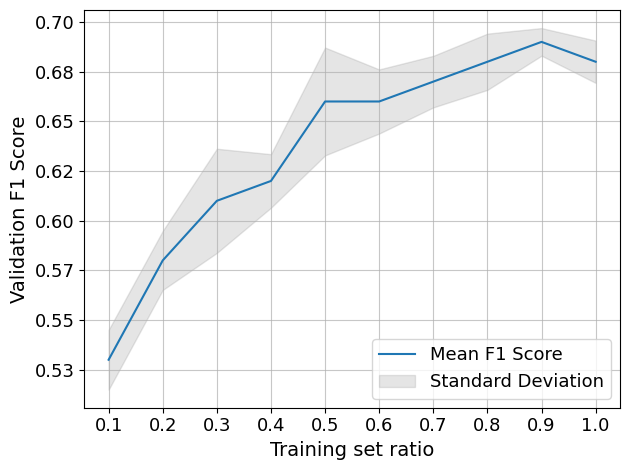

In [27]:
from matplotlib.ticker import StrMethodFormatter

# Define the main directory path
main_directory = 'bert/train_data_size_impact_experiment/'
results_file_to_process = 'eval_results.json'
data_sizes, average_f1, std_dev_f1 = process_model_train_outputs(main_directory, results_file_to_process)
    
# Sort the data sizes and corresponding average f1 values
sorted_indices = np.argsort(data_sizes)
sorted_data_sizes = np.array(data_sizes)[sorted_indices] / 100.0  # Divide by 100 for decimal display
sorted_average_f1 = np.round(np.array(average_f1)[sorted_indices], 2)  # Round to 2 decimal places
sorted_std_dev_f1 = np.array(std_dev_f1)[sorted_indices]

# Plotting
plt.plot(sorted_data_sizes, sorted_average_f1, label='Mean F1 Score')
plt.fill_between(sorted_data_sizes, sorted_average_f1 - sorted_std_dev_f1, sorted_average_f1 + sorted_std_dev_f1, color='gray', alpha=0.2, label='Standard Deviation')
plt.xlabel('Training set ratio',fontsize=14)
plt.ylabel('Validation F1 Score', fontsize=14)
#plt.title('Average F1 Score with Standard Deviation vs. Data Size')
plt.legend(fontsize=13, loc='lower right')
plt.grid(alpha=0.7)
# Set custom ticks on the x-axis
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

plt.xticks(sorted_data_sizes, fontsize=13)
plt.yticks(fontsize=13)
#plt.ylim(0, 1) #
plt.tight_layout()
plt.savefig('evaluations/plots/eval_F1_score_vs_train_data_size_NEW.pdf')  # Change the filename and dpi as needed
plt.show()

In [20]:
sorted_average_f1

array([0.53, 0.58, 0.61, 0.62, 0.66, 0.66, 0.67, 0.67, 0.69, 0.68])